# Topomap visualizations with MNE

### Content

+ [1. Notebook description](#1.-Notebook-Description)
+ [2. Load Data](#2.-Load-Data)
+ [3. Plots](#3.-Plots)

---

# 1. Notebook Description

This notebook is a plotting helper for my thesis. It generates example time series and topographic projections using an MNE montage.

---

**Imports:**

In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


In [2]:
# digits related code
from digits.data import matimport
from digits.data import select

# system libraries
import matplotlib.pyplot as plt
import numpy as np

from mne import create_info, EvokedArray
from mne.viz import plot_topomap, plot_layout, plot_montage
from mne.channels import make_eeg_layout

from IPython.display import HTML

# 2. Load Data

In [3]:
imp = matimport.Importer(dataroot='../../data/thomas/artcorr/')
imp.open('3130.h5')

In [4]:
samples = imp.store.samples
targets = imp.store.targets

And select a small portion of the samples.

In [5]:
samples = select.fromtimerange(samples, 't_0200', 't_0600')
samples = select.fromchannelblacklist(samples, ['LHEOG', 'RHEOG', 'IOL'])
samples, targets = select.fromtargetlist(samples, targets, [0,1])

# 3. Plots

In [6]:
info = create_info(select.getchannelnames(samples),
                   sfreq=1000,
                   ch_types='eeg',
                   montage='standard_1005')
layout = make_eeg_layout(info)

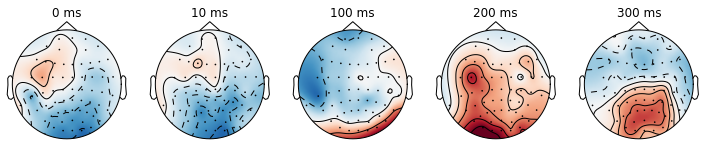

In [7]:
arr = EvokedArray(samples.ix[0].reshape(61, -2), info, tmin=0)
_ = arr.plot_topomap(times=[0, 10/1000, 100/1000, 200/1000, 300/1000], size=2, colorbar=False)

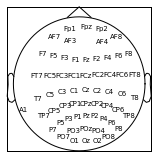

In [8]:
rcParams['figure.figsize'] = (2,2)
_ = plot_layout(layout)

Print some sample time series:

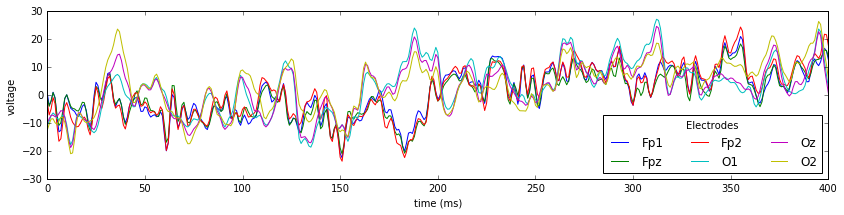

In [9]:
rcParams['figure.figsize'] = (14, 3)
# 10-20 list
es = ['Fp1', 'Fpz', 'Fp2',
      'O1', 'Oz', 'O2']
for e in es:
    plot(samples.iloc[0][e].values)
plt.legend(es, title='Electrodes', loc='lower right', ncol=3)
plt.xlabel('time (ms)')
_ = plt.ylabel('voltage')

Use html5 features for an animation:

Initializing animation...
Initializing animation...


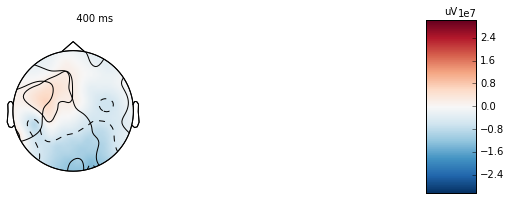

In [10]:
fig, anim = arr.animate_topomap('eeg', times = np.linspace(0,0.4,50),
                                frame_rate=1, blit=False, show=False)
anim.repeat = False
_ = HTML(anim.to_html5_video())

---